# Load in the confusion matrix

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("../../outputs/v01_confusion-data.csv")
labels = pd.read_json('/bask/homes/f/fspo1218/amber/data/gbif_costarica/01_costarica_data_numeric_labels.json', typ='series')

In [23]:
df.head()

,F_Truth,F_Prediction,G_Truth,G_Prediction,S_Truth,S_Prediction
0,24,24,797,797,3266,3266
1,56,56,211,211,3393,3393
2,57,57,1519,1519,2911,2911
3,53,53,531,531,5183,5183
4,42,42,835,835,110,110


**Key 🗝️**

F= family; 
G= genus; 
S=species

In [24]:
# Calculate accuracy
accuracy = accuracy_score(df['F_Truth'], df['F_Prediction'])
print(f'Family Accuracy: {accuracy:.4f}')

accuracy = accuracy_score(df['G_Truth'], df['G_Prediction'])
print(f'Genus Accuracy: {accuracy:.4f}')

accuracy = accuracy_score(df['S_Truth'], df['S_Prediction'])
print(f'Species Accuracy: {accuracy:.4f}')

Family Accuracy: 0.9480
Genus Accuracy: 0.9372
Species Accuracy: 0.9372


In [32]:
s_lab = labels['species_list']
g_lab = labels['genus_list']
f_lab = labels['family_list']

s_lab = {index: label for index, label in enumerate(s_lab)}
g_lab = {index: label for index, label in enumerate(g_lab)}
f_lab = {index: label for index, label in enumerate(f_lab)}

In [26]:
df['species_truth'] = df['S_Truth'].map(s_lab)
df['species_prediction'] = df['S_Prediction'].map(s_lab)

df['genus_truth'] = df['G_Truth'].map(g_lab)
df['genus_prediction'] = df['G_Prediction'].map(g_lab)

df['family_truth'] = df['F_Truth'].map(f_lab)
df['family_prediction'] = df['F_Prediction'].map(f_lab)

In [28]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator


def confusion_matrix_kg(tax_type="species"):
    cm = confusion_matrix(df[(tax_type[0]).upper() + '_Truth'], df[(tax_type[0]).upper() + '_Prediction'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=True, norm=LogNorm(),
                xticklabels=df[tax_type + '_truth'].unique(),
                yticklabels=df[tax_type + '_truth'].unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

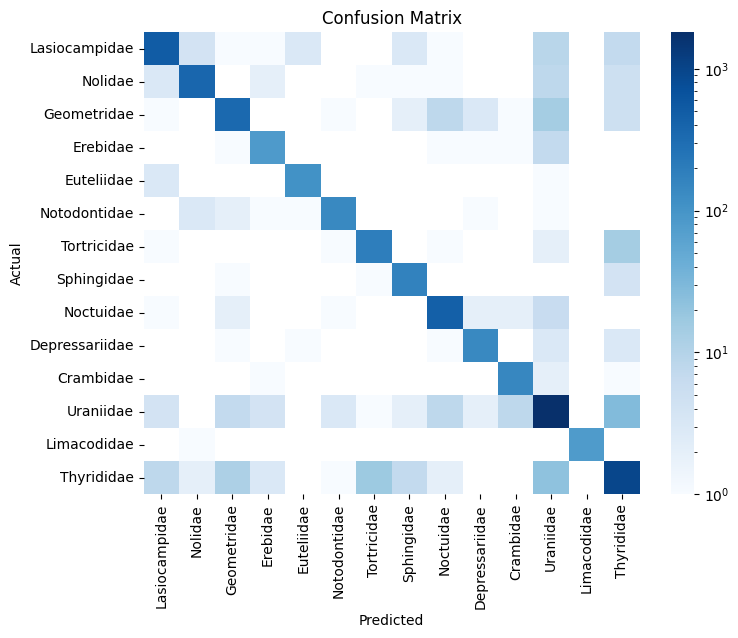

In [29]:
confusion_matrix_kg("family")

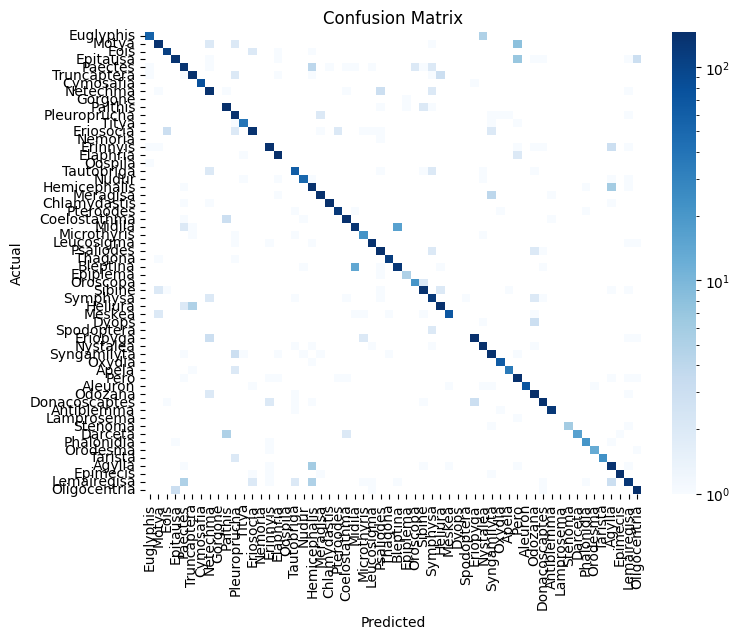

In [30]:
confusion_matrix_kg("genus")

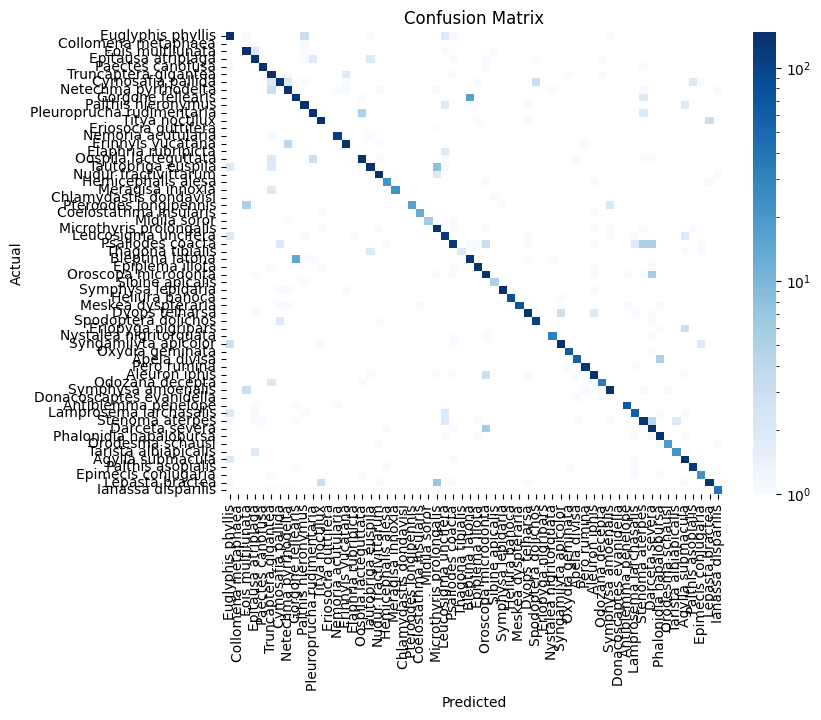

In [31]:
confusion_matrix_kg("species")

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np

# Create a confusion matrix


conf_matrix.shape

(58, 53)

In [96]:
def labelled_heatmap(tax_type):

    conf_matrix = pd.crosstab(df[tax_type + '_truth'], df[tax_type + '_prediction'], 
                              rownames=['Actual'], colnames=['Prediction'], dropna=False)

    mapping_dict = df.set_index(tax_type + '_truth')['family_truth'].to_dict()
    labels = conf_matrix.index.map(mapping_dict) #np.random.random_integers(0,5, size=matrix.shape[0])
    lut = dict(zip(set(labels), sns.hls_palette(len(set(labels)), l=0.5, s=0.8)))
    row_colors = (labels).map(lut)

    g=sns.clustermap(conf_matrix, col_cluster=True, row_cluster=True, linewidths=0.1, 
                     norm=LogNorm(), dendrogram_ratio=0.1,
                     cmap='Blues', row_colors=[row_colors])
    plt.show()

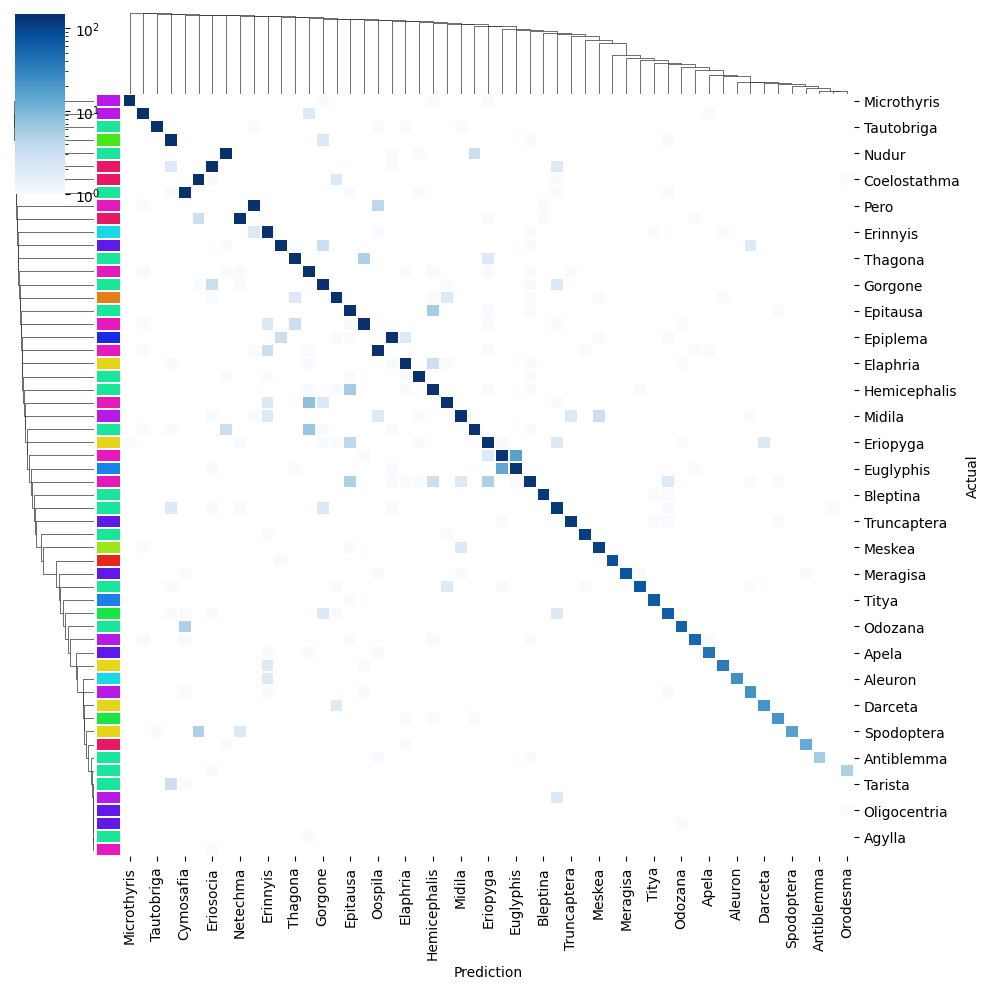

In [97]:
labelled_heatmap('genus')

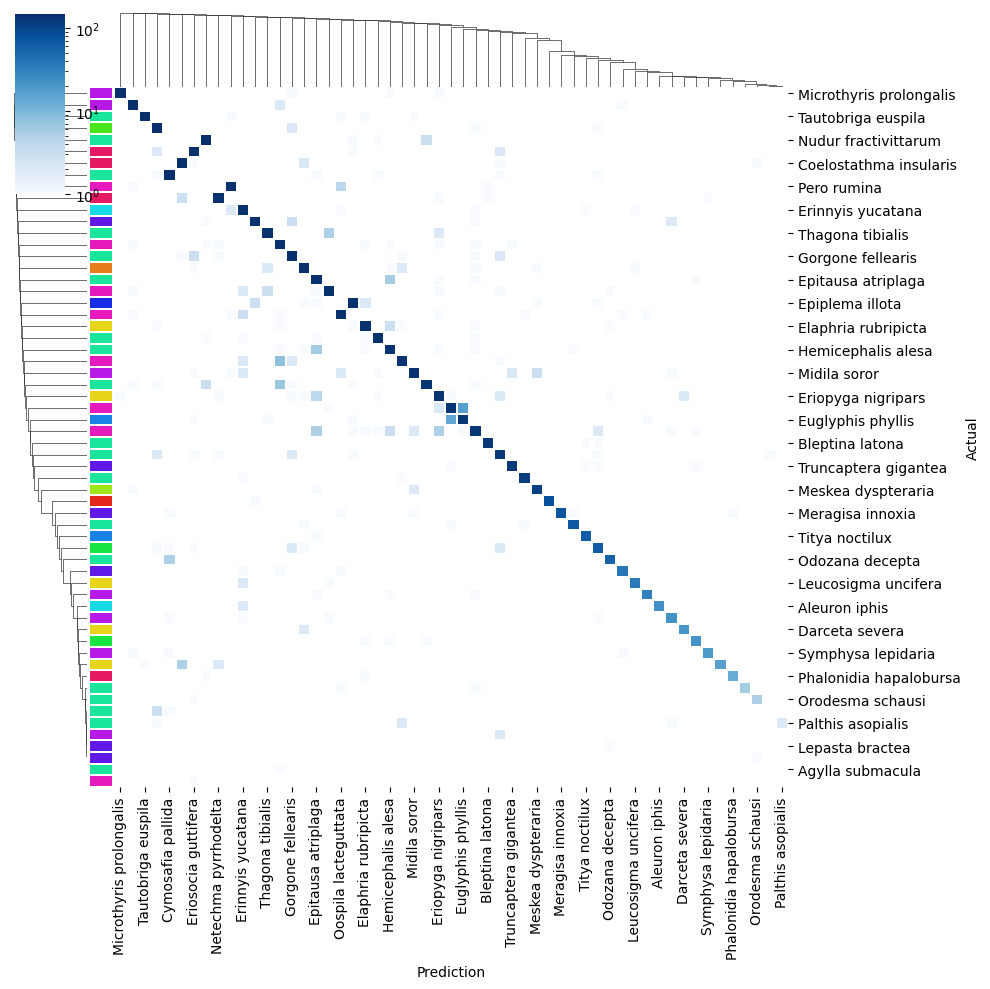

In [98]:
labelled_heatmap('species')